<a href="https://colab.research.google.com/github/anandpuntambekar/project-guidelines/blob/master/UK_House_PRICE_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import folium
from folium import features
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
%matplotlib inline

# Plots
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
Tweets = pd.read_csv("/content/drive/My Drive/10FA/Twitter_case_study_2_dataset.csv")
Tweets.drop('index', axis=1, inplace=True)
Tweets.head(3)

,date,country,latitude,longitude,source
0,7/27/2017,United Kingdom,54.523293,-1.539852,Android
1,7/27/2017,United Kingdom,51.448727,-1.014957,Android
2,7/27/2017,United Kingdom,51.084751,1.136008,Android


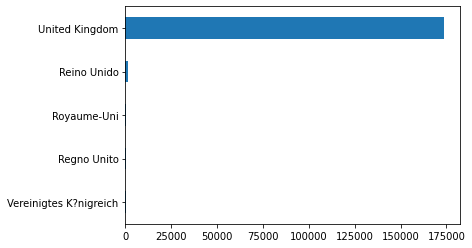

In [22]:
Tweets.country.value_counts(ascending=True).tail().plot.barh();

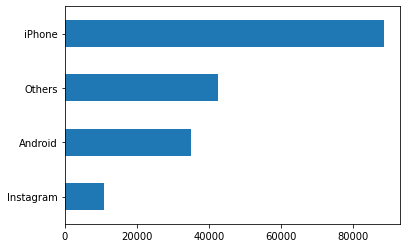

In [23]:
Tweets.source.value_counts(ascending=True).tail().plot.barh();

In [ ]:
df_map = folium.Map(location=[54.523293, -1.539852], zoom_start=3)
data = [[x[0], x[1], 1] for x in np.array(Tweets[['latitude', 'longitude']])]
HeatMap(data, radius = 20).add_to(df_map)
df_map

In [25]:
map_wb = folium.Map(location=[54.523293, -1.539852],zoom_start=1)
mc = MarkerCluster()
for ind,row in Tweets.iterrows():
    mc.add_child(folium.CircleMarker(location=[row['latitude'],row['longitude']],
                        radius=1,color='#3185cc'))
map_wb.add_child(mc)


In [35]:

map_wb

In [32]:
Tweets= Tweets[Tweets['latitude']>48.8566]
df_map = folium.Map(location=[54.523293, -1.539852], zoom_start=7)
data = [[x[0], x[1], 1] for x in np.array(Tweets[['latitude', 'longitude']])]
HeatMap(data, radius = 20).add_to(df_map)
df_map

In [101]:
Cities = pd.read_csv("/content/drive/My Drive/10FA/worldcities.csv")
Cities= Cities[Cities['country'] == 'United Kingdom']
Cities.head(3)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
25,London,London,51.5000,-0.1167,United Kingdom,GB,GBR,"London, City of",primary,8567000.0,1826645935
177,Birmingham,Birmingham,52.4750,-1.9200,United Kingdom,GB,GBR,Birmingham,admin,2285000.0,1826423213
181,Manchester,Manchester,53.5004,-2.2480,United Kingdom,GB,GBR,Manchester,admin,2230000.0,1826246335


In [102]:
Cities.drop('city', axis=1, inplace=True)
Cities.drop('country', axis=1, inplace=True)
Cities.drop('iso2', axis=1, inplace=True)
Cities.drop('iso3', axis=1, inplace=True)
Cities.drop('admin_name', axis=1, inplace=True)
Cities.drop('capital', axis=1, inplace=True)
Cities.drop('id', axis=1, inplace=True)
Cities['city_ascii']=Cities['city_ascii'].str.upper()
Cities.head(3)

,city_ascii,lat,lng,population
25,LONDON,51.5000,-0.1167,8567000.0
177,BIRMINGHAM,52.4750,-1.9200,2285000.0
181,MANCHESTER,53.5004,-2.2480,2230000.0


In [57]:
Paid_Price = pd.read_csv("/content/drive/My Drive/10FA/price_paid_records.csv")
Paid_Price=Paid_Price.sample(frac = 0.02) 
Paid_Price.head(3)

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
1988109,{534F7799-8FCC-4357-ADC1-8C9A4046A732},187500,1997-04-01 00:00,D,N,F,STOURBRIDGE,DUDLEY,WEST MIDLANDS,A,A
20061505,{AE221582-6924-4B9C-80FE-D3D4194F5F2E},112500,2014-06-27 00:00,S,N,F,NEWARK,SOUTH KESTEVEN,LINCOLNSHIRE,A,A
446326,{C06FFBEF-54EB-4427-8E9A-E6402679A7D5},54000,1995-08-11 00:00,D,N,F,SAXMUNDHAM,SUFFOLK COASTAL,SUFFOLK,A,A


In [41]:
Paid_Price.dtypes

Price                                  int64
Date of Transfer                      object
Property Type                         object
Old/New                               object
Duration                              object
Town/City                             object
District                              object
County                                object
PPDCategory Type                      object
Record Status - monthly file only     object
city_ascii                            object
lat                                  float64
lng                                  float64
population                           float64
Tweets_Count_1                       float64
Tweets_Count_05                      float64
Tweets_Count_025                     float64
Tweets_Count_001                     float64
dtype: object

## Duplicates
First we check Paid_Price to see if there are any duplicate rows in the data, in this data we indentify none.

However, searching for duplicates on all columns except ID shows that approximately 0.05% are in fact duplicates but we can ignore this 

In [36]:
len(Paid_Price.drop_duplicates())

451136

House Price Distribution
Let us take a quick exploratory look at the distribution of house prices. We see that the majority of house prices across all years is less than £500,000.

I first created a histogram using plot.ly but due to the sheer size this caused performance issues so instead resorted to using a simple matplolib plot.



Remove outliers
I then reduced the data by removing extreme house prices. Those are the ones that are:

less than £10 Million and,
greater than £10,000

Text(0.5, 1.0, 'Price')

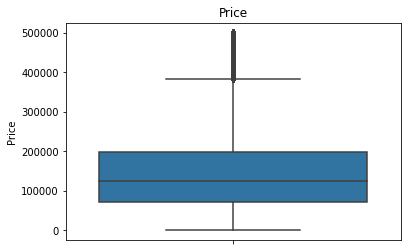

In [51]:
sns.boxplot(y = Paid_Price['Price'])
plt.title('Price')

In [53]:
print(len(Paid_Price))
Paid_Price = Paid_Price.loc[(Paid_Price['Price'] < (10000000)) & (Paid_Price['Price'] > (10000)),]
len(Paid_Price)

435063


434232

[Text(0.5, 1.0, 'SalePrice distribution')]

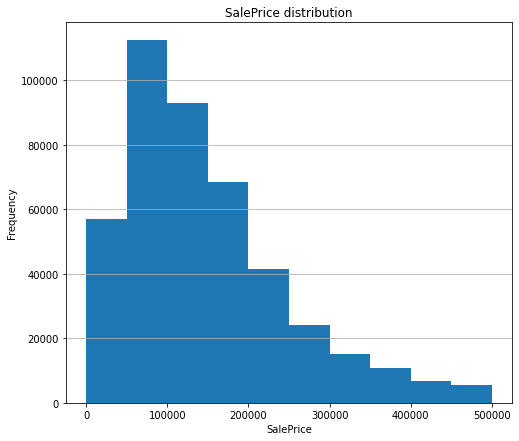

In [45]:
#Let us take a quick exploratory look at the distribution of house prices. We see that the majority of house prices across all years is less than £500,000.
f, ax = plt.subplots(figsize=(8, 7))

Paid_Price=Paid_Price[Paid_Price['Price']<500000]

Paid_Price['Price'].hist()

ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")



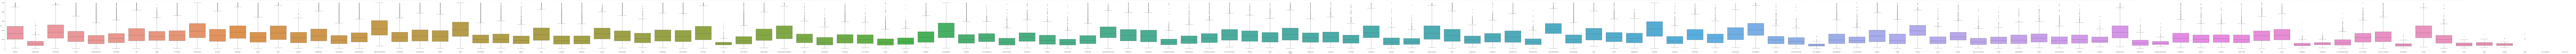

In [52]:
data = pd.concat([Paid_Price['Price'], Paid_Price['County']], axis=1)
f, ax = plt.subplots(figsize=(600, 12))
fig = sns.boxplot(x=Paid_Price['County'], y="Price", data=data)

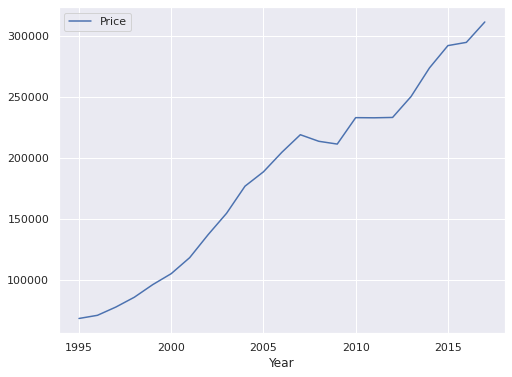

In [107]:

Paid_Price['Date of Transfer'] = pd.to_datetime(Paid_Price['Date of Transfer'])
Paid_Price['Year'] = Paid_Price['Date of Transfer'].dt.year
Paid_Price['Month'] = Paid_Price['Date of Transfer'].dt.month
Paid_Price['Day'] = Paid_Price['Date of Transfer'].dt.day

Paid_Price_series=Paid_Price.groupby(['Year'])['Price'].mean().reset_index()

Paid_Price_series.set_index('Year', inplace=True)


#f, ax = plt.subplots(figsize=(8, 7))

Paid_Price_series=Paid_Price_series[Paid_Price_series['Price']<500000]


Paid_Price_series.plot(figsize= (8,6))




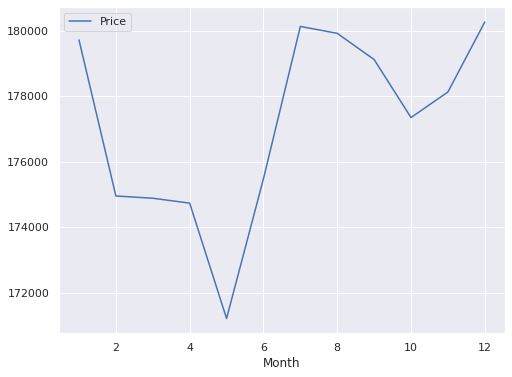

In [93]:


Paid_Price_series=Paid_Price.groupby(['Month'])['Price'].mean().reset_index()

Paid_Price_series.set_index('Month', inplace=True)


#f, ax = plt.subplots(figsize=(8, 7))

Paid_Price_series=Paid_Price_series[Paid_Price_series['Price']<500000]


Paid_Price_series.plot(figsize= (8,6))



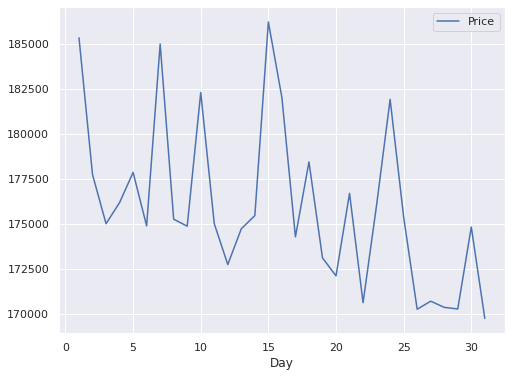

In [108]:
Paid_Price_series=Paid_Price.groupby(['Day'])['Price'].mean().reset_index()

Paid_Price_series.set_index('Day', inplace=True)


#f, ax = plt.subplots(figsize=(8, 7))

Paid_Price_series=Paid_Price_series[Paid_Price_series['Price']<500000]


Paid_Price_series.plot(figsize= (8,6))


In [10]:
Cities.loc[:,'Tweets_Count_1']=0
Cities.head(2)

,city_ascii,lat,lng,population,Tweets_Count_1
25,LONDON,51.500,-0.1167,8567000.0,0
177,BIRMINGHAM,52.475,-1.9200,2285000.0,0


In [103]:
def Count_Tweets(lat_city,long_city,ck):
   Tweets_tmp = Tweets[(Tweets['latitude']<=lat_city+ck) & (Tweets['latitude']>=lat_city-ck) & (Tweets['longitude']>=long_city-ck) & (Tweets['longitude']<=long_city+ck) ]
   #print(Tweets_tmp.shape[0])
   return Tweets_tmp.shape[0]

ck=1
Cities.loc[:,'Tweets_Count_1']=0
Cities['Tweets_Count_1'] = Cities.apply(lambda row: Count_Tweets(row['lat'], row['lng'], ck), axis=1)

ck=0.5
Cities.loc[:,'Tweets_Count_05']=0
Cities['Tweets_Count_05'] = Cities.apply(lambda row: Count_Tweets(row['lat'], row['lng'], ck), axis=1)

ck=0.25
Cities.loc[:,'Tweets_Count_025']=0
Cities['Tweets_Count_025'] = Cities.apply(lambda row: Count_Tweets(row['lat'], row['lng'], ck), axis=1)

ck=0.01
Cities.loc[:,'Tweets_Count_001']=0
Cities['Tweets_Count_001'] = Cities.apply(lambda row: Count_Tweets(row['lat'], row['lng'], ck), axis=1)


Cities.head(3)

,city_ascii,lat,lng,population,Tweets_Count_1,Tweets_Count_05,Tweets_Count_025,Tweets_Count_001
25,LONDON,51.5000,-0.1167,8567000.0,8201,6493,5531,209
177,BIRMINGHAM,52.4750,-1.9200,2285000.0,3008,811,469,92
181,MANCHESTER,53.5004,-2.2480,2230000.0,2595,998,578,0


In [104]:
#Tweets= Tweets[Tweets['latitude']>48.8566]
df_map = folium.Map(location=[54.523293, -1.539852], zoom_start=7)
data = [[x[0], x[1], x[2]] for x in np.array(Cities[['lat', 'lng','Tweets_Count_05']])]
HeatMap(data, radius = 20).add_to(df_map)
df_map

In [105]:
print(Paid_Price.shape)
Paid_Price= pd.merge (Paid_Price, Cities , left_on= 'Town/City' ,  right_on = 'city_ascii', how='left')
print(Paid_Price.shape)

(454980, 28)
(461904, 36)


In [106]:

#Paid_Price.drop('Transaction unique identifier', axis=1, inplace=True)
Paid_Price.head(3)

,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,Year,Month,city_ascii_x,lat_x,lng_x,population_x,Tweets_Count_1_x,Tweets_Count_05_x,Tweets_Count_025_x,Tweets_Count_001_x,city_ascii_y,lat_y,lng_y,population_y,Tweets_Count_1_y,Tweets_Count_05_y,Tweets_Count_025_y,Tweets_Count_001_y,city_ascii,lat,lng,population,Tweets_Count_1,Tweets_Count_05,Tweets_Count_025,Tweets_Count_001
0,187500,1997-04-01,D,N,F,STOURBRIDGE,DUDLEY,WEST MIDLANDS,A,A,1997,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,112500,2014-06-27,S,N,F,NEWARK,SOUTH KESTEVEN,LINCOLNSHIRE,A,A,2014,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54000,1995-08-11,D,N,F,SAXMUNDHAM,SUFFOLK COASTAL,SUFFOLK,A,A,1995,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
from fastai.tabular import *

In [111]:
from fastai.tabular import add_datepart

In [112]:
add_datepart(Paid_Price, 'Date of Transfer')

,Price,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,Year,Month,city_ascii_x,lat_x,lng_x,population_x,Tweets_Count_1_x,Tweets_Count_05_x,Tweets_Count_025_x,Tweets_Count_001_x,city_ascii_y,lat_y,lng_y,population_y,Tweets_Count_1_y,Tweets_Count_05_y,Tweets_Count_025_y,Tweets_Count_001_y,city_ascii,lat,lng,population,Tweets_Count_1,Tweets_Count_05,Tweets_Count_025,Tweets_Count_001,Day,Date of TransferYear,Date of TransferMonth,Date of TransferWeek,Date of TransferDay,Date of TransferDayofweek,Date of TransferDayofyear,Date of TransferIs_month_end,Date of TransferIs_month_start,Date of TransferIs_quarter_end,Date of TransferIs_quarter_start,Date of TransferIs_year_end,Date of TransferIs_year_start,Date of TransferElapsed
0,187500,D,N,F,STOURBRIDGE,DUDLEY,WEST MIDLANDS,A,A,1997,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1997,4,14,1,1,91,False,True,False,True,False,False,859852800
1,112500,S,N,F,NEWARK,SOUTH KESTEVEN,LINCOLNSHIRE,A,A,2014,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,2014,6,26,27,4,178,False,False,False,False,False,False,1403827200
2,54000,D,N,F,SAXMUNDHAM,SUFFOLK COASTAL,SUFFOLK,A,A,1995,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,1995,8,32,11,4,223,False,False,False,False,False,False,808099200
3,87000,T,N,F,NUNEATON,NUNEATON AND BEDWORTH,WARWICKSHIRE,A,A,2016,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,2016,4,17,26,1,117,False,False,False,False,False,False,1461628800
4,108000,F,Y,L,CARDIFF,CARDIFF,CARDIFF,A,A,2003,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,2003,7,29,18,4,199,False,False,False,False,False,False,1058486400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461899,395000,D,N,F,NEWPORT,ISLE OF WIGHT,ISLE OF WIGHT,A,A,2014,10,NEWPORT,51.5833,-2.9833,NaN,1921.0,512.0,182.0,6.0,NEWPORT,50.7000,-1.3000,NaN,1510.0,309.0,207.0,4.0,NEWPORT,50.7000,-1.3000,NaN,1510.0,309.0,207.0,4.0,16,2014,10,42,16,3,289,False,False,False,False,False,False,1413417600
461900,395000,D,N,F,NEWPORT,ISLE OF WIGHT,ISLE OF WIGHT,A,A,2014,10,NEWPORT,51.5833,-2.9833,NaN,1921.0,512.0,182.0,6.0,NEWPORT,50.7000,-1.3000,NaN,1510.0,309.0,207.0,4.0,NEWPORT,51.5833,-2.9833,NaN,1921.0,512.0,182.0,6.0,16,2014,10,42,16,3,289,False,False,False,False,False,False,1413417600
461901,395000,D,N,F,NEWPORT,ISLE OF WIGHT,ISLE OF WIGHT,A,A,2014,10,NEWPORT,51.5833,-2.9833,NaN,1921.0,512.0,182.0,6.0,NEWPORT,51.5833,-2.9833,NaN,1921.0,512.0,182.0,6.0,NEWPORT,50.7000,-1.3000,NaN,1510.0,309.0,207.0,4.0,16,2014,10,42,16,3,289,False,False,False,False,False,False,1413417600
461902,395000,D,N,F,NEWPORT,ISLE OF WIGHT,ISLE OF WIGHT,A,A,2014,10,NEWPORT,51.5833,-2.9833,NaN,1921.0,512.0,182.0,6.0,NEWPORT,51.5833,-2.9833,NaN,1921.0,512.0,182.0,6.0,NEWPORT,51.5833,-2.9833,NaN,1921.0,512.0,182.0,6.0,16,2014,10,42,16,3,289,False,False,False,False,False,False,1413417600
